#### Unigram Language Model from Scratch

Generated Text: powerful powerful hello newest newest low lower models newest newest
Perplexity: 8.5


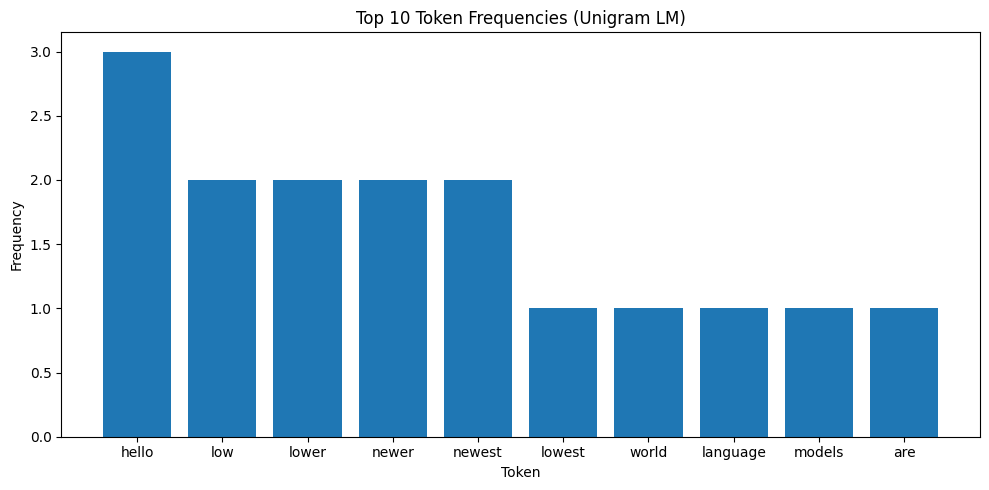

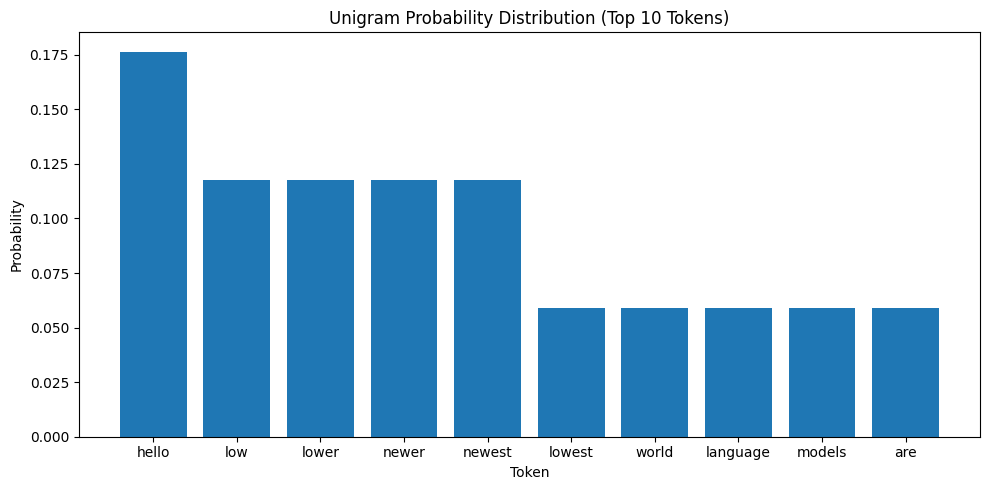

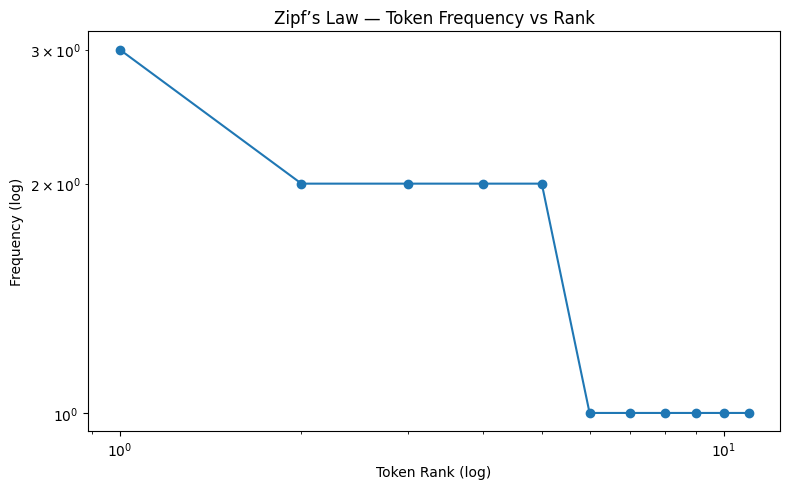

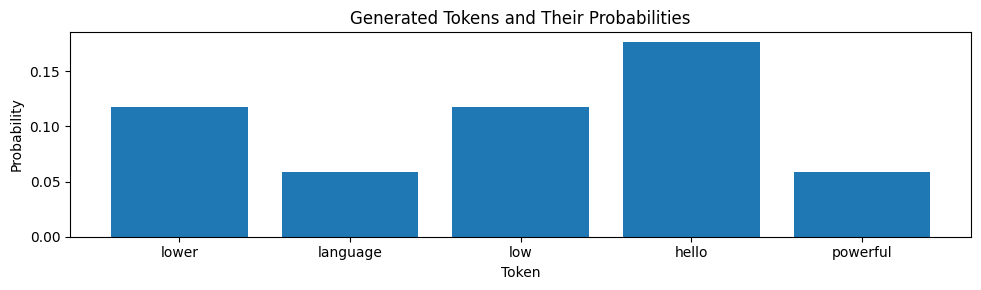

In [ ]:
from collections import Counter
import math
import random
import matplotlib.pyplot as plt

corpus = [
    "low lower lowest",
    "newer newer newest",
    "low newest lower",
    "hello world hello hello",
    "language models are powerful"
]

def tokenize(text):
    return text.lower().split()

def train_unigram(corpus):
    counter = Counter()
    total = 0

    for sentence in corpus:
        tokens = tokenize(sentence)
        counter.update(tokens)
        total += len(tokens)

    probs = {token: count / total for token, count in counter.items()}
    return probs, counter, total
unigram_probs, unigram_counts, total_tokens = train_unigram(corpus)

def generate_text(unigram_probs, length=10):
    tokens = list(unigram_probs.keys())
    weights = list(unigram_probs.values())
    return " ".join(random.choices(tokens, weights=weights, k=length))
print("Generated Text:", generate_text(unigram_probs, 10))

def perplexity(sentence, unigram_probs):
    tokens = tokenize(sentence)
    log_prob_sum = 0

    for token in tokens:
        prob = unigram_probs.get(token, 1e-9)
        log_prob_sum += math.log(prob)

    N = len(tokens)
    return math.exp(-log_prob_sum / N)
test_sentence = "low newest lower"
print("Perplexity:", perplexity(test_sentence, unigram_probs))

top_tokens = unigram_counts.most_common(10)
tokens, counts = zip(*top_tokens)

plt.figure(figsize=(10, 5))
plt.bar(tokens, counts)
plt.title("Top 10 Token Frequencies (Unigram LM)")
plt.xlabel("Token")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

probs = [unigram_probs[token] for token in tokens]

plt.figure(figsize=(10, 5))
plt.bar(tokens, probs)
plt.title("Unigram Probability Distribution (Top 10 Tokens)")
plt.xlabel("Token")
plt.ylabel("Probability")
plt.tight_layout()
plt.show()

freqs = sorted(unigram_counts.values(), reverse=True)
ranks = range(1, len(freqs) + 1)

plt.figure(figsize=(8, 5))
plt.loglog(ranks, freqs, marker="o")
plt.title("Zipf’s Law — Token Frequency vs Rank")
plt.xlabel("Token Rank (log)")
plt.ylabel("Frequency (log)")
plt.tight_layout()
plt.show()

gen_tokens = generate_text(unigram_probs, 8).split()
gen_probs = [unigram_probs[t] for t in gen_tokens]

plt.figure(figsize=(10, 3))
plt.bar(gen_tokens, gen_probs)
plt.title("Generated Tokens and Their Probabilities")
plt.xlabel("Token")
plt.ylabel("Probability")
plt.tight_layout()
plt.show()
